In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize

from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor, TheilSenRegressor

In [2]:
def model(x, a, b):
    return a * x[:, 0] + b

In [3]:
def residuals_factory(x, y):
    def wrapped(beta):
        return y - model(x, beta[0], beta[1])
    return wrapped

In [4]:
X = np.linspace(-1, 1, 21).reshape(-1, 1)
y = model(X, 3, 2)

In [5]:
yn = y + 0.10 * np.random.normal(size=y.size)
yn[-3] *= 1.5
yn[-2] *= 2
yn[-1] *= 3

In [6]:
popt, pcov = optimize.curve_fit(model, X, yn)
popt

array([5.07168657, 2.8054073 ])

In [7]:
Xlin = np.linspace(-1.1, 1.1, 100).reshape(-1, 1)

In [8]:
yhat = model(Xlin, *popt)

In [9]:
residuals = residuals_factory(X, yn)

In [10]:
sol1 = optimize.least_squares(residuals, x0=[1,1])
yhat1 = model(X, *sol1.x)
sol1.x

array([5.07168654, 2.80540729])

In [11]:
sol2 = optimize.least_squares(residuals, x0=[1,1], loss="soft_l1")
yhat2 = model(X, *sol2.x)
sol2.x

array([3.64855281, 2.27207845])

In [12]:
sol3 = optimize.least_squares(residuals, x0=[1,1], loss="cauchy")
yhat3 = model(X, *sol3.x)
sol3.x

array([3.13243227, 2.06161631])

In [13]:
sol4 = optimize.least_squares(residuals, x0=[1,1], loss="arctan")
yhat4 = model(X, *sol4.x)
sol4.x

array([3.00307223, 2.00785498])

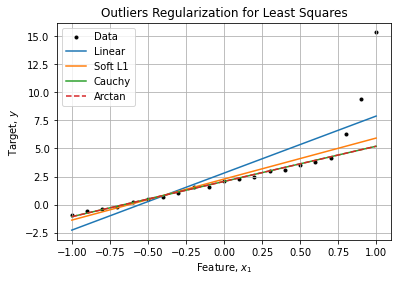

In [14]:
fig, axe = plt.subplots()
axe.scatter(X, yn, color="black", marker=".", label="Data")
axe.plot(X, yhat1, label="Linear")
axe.plot(X, yhat2, label="Soft L1")
axe.plot(X, yhat3, label="Cauchy")
axe.plot(X, yhat3, linestyle="--", label="Arctan")
axe.set_title("Outliers Regularization for Least Squares")
axe.set_xlabel(r"Feature, $x_1$")
axe.set_ylabel(r"Target, $y$")
axe.legend()
axe.grid()
axe.figure.savefig("figures/Linear/RegularizationFit.pdf")

In [15]:
rlin = np.logspace(-1, 3, 100)
linear = rlin**2
softl1 = 2*(np.sqrt(1 + rlin**2) - 1)
cauchy = np.log(1 + rlin**2)
arctan = np.arctan(rlin**2)

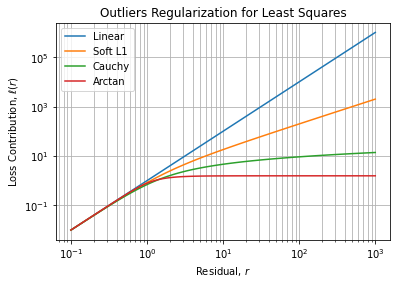

In [16]:
fig, axe = plt.subplots()
axe.loglog(rlin, linear, label="Linear")
axe.plot(rlin, softl1, label="Soft L1")
axe.plot(rlin, cauchy, label="Cauchy")
axe.plot(rlin, arctan, label="Arctan")
axe.set_title("Outliers Regularization for Least Squares")
axe.set_xlabel(r"Residual, $r$")
axe.set_ylabel(r"Loss Contribution, $\ell(r)$")
axe.legend()
axe.grid(which="both")
axe.figure.savefig("figures/Linear/RegularizationFunction.pdf")

In [34]:
regressors = [
    LinearRegression(),
    HuberRegressor(),
]

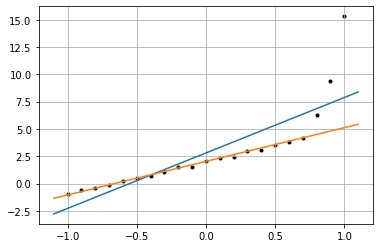

In [35]:
fig, axe = plt.subplots()
axe.scatter(X, yn, color="black", marker=".", label="Data")
for regressor in regressors:
    regressor.fit(X, yn)
    score = regressor.score(X, yn)
    axe.plot(Xlin, regressor.predict(Xlin))
axe.grid()